In [38]:
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
mpl.rcParams['font.size'] = 10

import matplotlib.pyplot as plt

In [39]:
import disolv

convertFEC=True

disolv.run('Input', 'Output', calibrate=True, convertFEC=convertFEC,
           method='SLSQP')

Automatic calibration
Equation will be solved at times 0.025694444, 0.060416667, 0.097222222, 0.129166667, 0.157638889
5 measured profiles have been found


D:\Workspace\hugm0001\anaconda\lib\site-packages\scipy\optimize\_numdiff.py:579: RuntimeWarning: invalid value encountered in true_divide
  J_transposed[i] = df / dx


RMSE: 2.3925140317559688


In [40]:
prof = pd.read_csv(os.path.join('Output', 'profiles.csv'))
meas = pd.read_csv(os.path.join('Input', 'measuredprofiles.csv'))

In [41]:
def ConvertFEC(InData, Temp=20):

    Concentrations = np.zeros(len(InData))
    for i in range(len(InData)):
        if InData[i] < 10000:
            FEC20 = InData[i]/(1 + 0.024 * (Temp - 20))
            Concentrations[i] = (1870 - np.sqrt(1870**2 - 160 * FEC20))/80
        else:
            FEC23 = InData[i]/(1 + 0.024 * (Temp - 23))/1000/1000 * 100
            Concentrations[i] = (5.9738E-7 * FEC23**6 - 3.5136E-5 *
            FEC23**5 + 7.823E-4 * FEC23**4 - 8.0334E-3 * FEC23**3 +
            4.0791E-2 * FEC23**2 + 3.4996E-2 * FEC23 + 3.6104E-2) * 58.44

    return Concentrations

In [42]:
if convertFEC==True:
    for col in meas.columns[1::2]:
        meas[col] = ConvertFEC(meas[col])

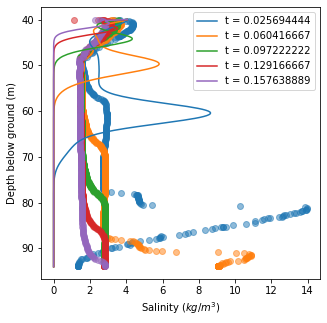

In [43]:
fig = plt.figure(figsize=(5, 5))

import matplotlib.colors as mcolors

colours = mcolors.TABLEAU_COLORS


x = 0
for col in prof.columns[1:]:
    plt.plot(prof[col], prof['Depth [L]'], label=col, )
        
    plt.scatter(meas.iloc[:,x+1], meas.iloc[:,x+0],  marker = 'o', alpha=0.5)
    x+=2

plt.ylabel('Depth below ground (m)')
plt.xlabel('Salinity ($kg/m^3)$')
plt.legend()

plt.gca().invert_yaxis()